In [2]:

pip install pydot graphviz


In [3]:
!pip install keras.utils.vis_utils

ERROR: Could not find a version that satisfies the requirement keras.utils.vis_utils (from versions: none)
ERROR: No matching distribution found for keras.utils.vis_utils


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [10]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [11]:
X,y

(array([[-0.63640493, -0.36870191],
        [-0.24465976, -0.73659196],
        [-0.46597138, -1.06687743],
        [-0.70999784, -0.40841948],
        [ 0.70232238, -0.51730147],
        [-0.49776571,  0.76955129],
        [-0.31914906, -0.84899624],
        [-0.57839322, -0.49081236],
        [-0.53350227,  0.58056527],
        [-0.24733259,  0.73011595],
        [ 0.41030774, -0.73075986],
        [ 0.17181003, -0.92504802],
        [ 0.65917045,  0.62120588],
        [ 0.87625577,  0.12510879],
        [ 0.81946243, -0.01347859],
        [-0.47960986, -0.7880243 ],
        [-0.90187751, -0.70895455],
        [ 0.74827659, -0.55976747],
        [-0.74875324, -0.37153443],
        [ 0.23161178,  1.01205842],
        [ 0.81387506,  0.22821311],
        [-0.92169575,  0.20310719],
        [ 0.74650434, -0.35861224],
        [ 0.01330079,  0.68169193],
        [-0.72651409,  0.58630948],
        [-0.33930852, -1.0080984 ],
        [ 0.49009938, -0.62509577],
        [-0.9539309 , -0.334

In [12]:
(X.shape,y.shape)
print(type(X))
print(y.ndim)
print(type(y))
# y=y.reshape(-1,1)
print(y.ndim)


<class 'numpy.ndarray'>
1
<class 'numpy.ndarray'>
1


In [13]:
y.shape

(100,)

In [18]:
type(X[:, 1])
X[:, 1].ndim
X[:,1].shape

(100,)

<Axes: >

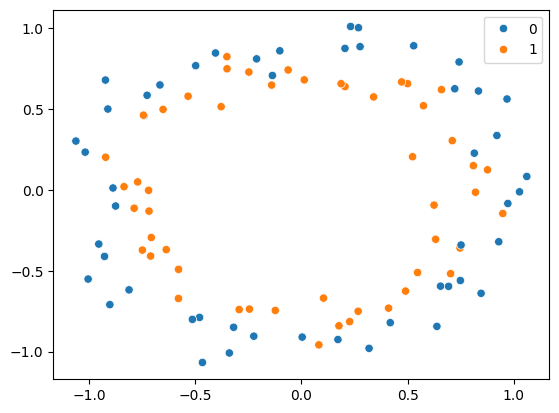

In [14]:

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [20]:
# define model
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

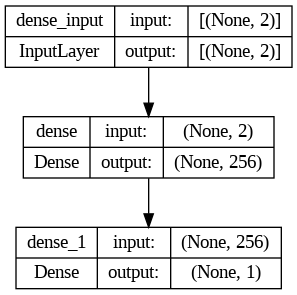

In [21]:
from tensorflow.keras.utils import plot_model


# Compile the model (necessary for visualization in some environments)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# This line is to display the image in a Jupyter notebook (optional)
from IPython.display import Image
Image(filename='model_plot.png')


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

In [24]:
history

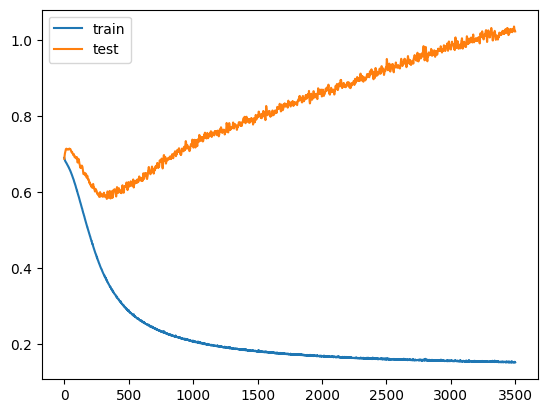

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [60]:
y_pred=(model.predict(X_test)>0.5)
print(type(y_pred))
print(y_pred[0][0])
# print(y_pred.astype(int))
y_pred=y_pred.astype(int).ravel()



print(y_pred.shape)
print(y_test.shape)
print(y_pred)

1/1 [==============================] - 0s 39ms/step
<class 'numpy.ndarray'>
True
(20,)
(20,)
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0]


In [65]:
print('accuracy',sum(y_pred==y_test)/len(y_test)*100)

accuracy 60.0


9600/9600 [==============================] - 15s 2ms/step


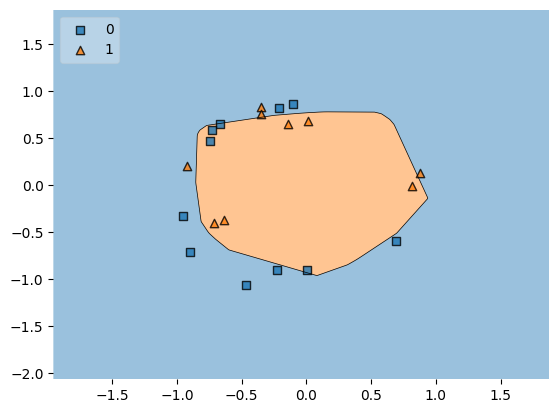

In [66]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()


# Early Stopping

In [67]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 110ms/step - loss: 0.6648 - accuracy: 0.5875 - val_loss: 0.7182 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 59ms/step - loss: 0.6640 - accuracy: 0.6000 - val_loss: 0.7190 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 67ms/step - loss: 0.6635 - accuracy: 0.6000 - val_loss: 0.7194 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 55ms/step - loss: 0.6627 - accuracy: 0.6000 - val_loss: 0.7194 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 73ms/step - loss: 0.6619 - accuracy: 0.5875 - val_loss: 0.7194 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 47ms/step - loss: 0.6612 - accuracy: 0.5875 - val_loss: 0.7198 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 53ms/step - loss: 0.6604 - accuracy: 0.6125 - val_loss: 0.7197 - val_accuracy: 0.4500
Epoch 8/3500

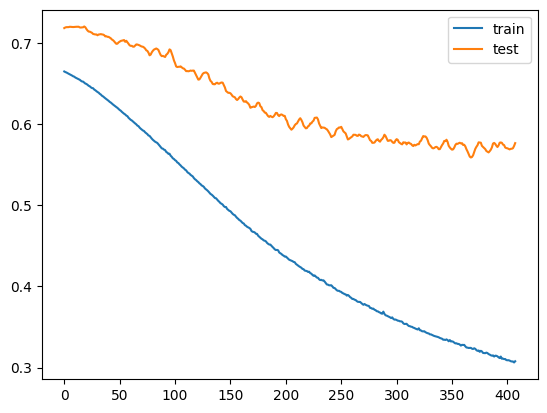

In [74]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


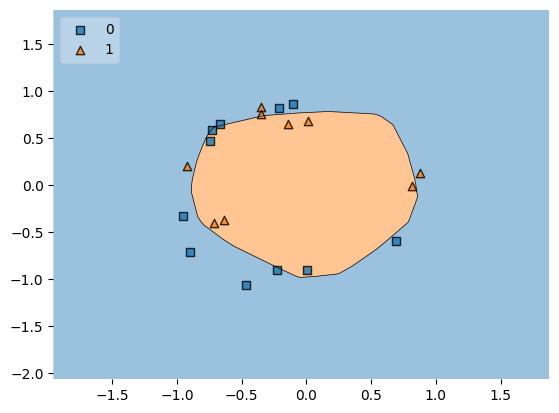

In [75]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [76]:
y_pred=(model.predict(X_test)>0.5)
print(type(y_pred))
print(y_pred[0][0])
# print(y_pred.astype(int))
y_pred=y_pred.astype(int).ravel()



print(y_pred.shape)
print(y_test.shape)
print(y_pred)

1/1 [==============================] - 0s 53ms/step
<class 'numpy.ndarray'>
False
(20,)
(20,)
[0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0]


In [79]:
# accuracy improved as we did early stopping as we are avoiding overfitting by reducing the number of epochs
print('accuracy',sum(y_pred==y_test)/len(y_test)*100)


accuracy 65.0
